# Análisis de los datos

## Parámetros del programa

In [39]:
# Ficheros con los que trabajamos
csv_brute = "traspuesta_iter.data"
csv_dac = "transpose_dyv.csv"
csv_file = csv_dac
algorithm_name = "Trasposición de una matriz"

# Parametros para las graficas
height_parameter = 9
width_parameter = 15
quality = 200

## Módulos necesarios

In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Funciones auxiliares

In [41]:
def generate_data(data_file):
    x_values = []
    y_values = []
    
    with open(data_file, "r") as file_obj:
        # All data is saved on lines
        lines = file_obj.readlines()
       
        # I don't want the title
        lines.pop(0)
        
        # Get rid of trailing end of lines
        lines = [line.strip("\n") for line in lines]
        
        # Separate values by comma
        lines = [line.split(",") for line in lines]

        # Read the data on the arrays
        for line in lines:
            x_values.append(int(line[0]))
            y_values.append(float(line[1]))
    
    return x_values, y_values

In [42]:
def generate_function_plot(data_file, title):
    x_values = []
    y_values = []

    # Extract data from the file
    x_values, y_values = generate_data(data_file)


    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.plot(x_values, y_values)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")

def generate_log2_function_plot(data_file, title):
    x_values = []
    y_values = []

    # Extract data from the file
    x_values, y_values = generate_data(data_file)

    x_values = [math.log2(x) for x in x_values]

    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.plot(x_values, y_values)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")    
    
    
def generate_function_points_plot(data_file, title):
    x_values = []
    y_values = []

    # Extract data from the file
    x_values, y_values = generate_data(data_file)


    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")
    
def generate_scatter_plot(data_file, title):
    x_values = []
    y_values = []

    # Extract data from the file
    x_values, y_values = generate_data(data_file)


    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")

def generate_log_scatter_plot(data_file, title):
    x_values = []
    y_values = []

    # Extract data from the file
    x_values, y_values = generate_data(data_file)
    x_values = [math.log2(x) for x in x_values]


    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")
    
def generate_group_plot(title, sergio_csv, lucia_csv, miguel_csv, celia_csv):
    colors = ["r", "g", "b", "y"]
    figures = ["o-", "v-", "s-", "*-"]
    legends = ["Sergio", "Lucia", "Miguel Angel", "Celia"]
    
    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")

    # Each data set
    for index, csv_file in enumerate([sergio_csv, lucia_csv, miguel_csv, celia_csv]):
        x_values = []
        y_values = []

        # Extract data from the file
        x_values, y_values = generate_data(csv_file)
        
        # Add points to the graphic
        plt.plot(x_values, y_values, figures[index], color=colors[index], label=legends[index])

    # We use legends
    plt.legend(legends)
    
def generate_two_functions_plot(title, csv_brute, csv_dac):
    colors = ["r", "b"]
    figures = ["o-", "v-"]
    legends = ["Fuerza Bruta", "Divide y vencerás"]
    
    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")

    # Each data set
    for index, csv_file in enumerate([csv_brute, csv_dac]):
        x_values = []
        y_values = []

        # Extract data from the file
        x_values, y_values = generate_data(csv_file)
        
        # Add points to the graphic
        plt.plot(x_values, y_values, figures[index], color=colors[index], label=legends[index])

    # We use legends
    plt.legend(legends)

def generate_function_aproximation(x_values, y_values, y_aproximation_values, title):
    # Graph the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.plot(x_values, y_aproximation_values)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")

def generate_function_representation(title, csv_file, function, *coeffs):
    """Given a set of points, a function and a it's coefficients, the given function is represented"""
    # We get the data set
    x_values, y_values = generate_data(csv_file)
    
    # We get the function image
    y_aprox = [function(x, *coeffs) for x in x_values]
    
    # We plot the data
    plt.figure(figsize=(width_parameter, height_parameter), dpi = quality)
    plt.title(title)
    plt.plot(x_values, y_values, "x")
    plt.plot(x_values, y_aprox)
    plt.xlabel("Input size")
    plt.ylabel("Time (us)")
    

In [43]:
def fit_function(data_file, function):
    # Extract data from file
    x_values, y_values = generate_data(data_file)
    
    # Fit function to the data
    fit_data = curve_fit(function, x_values, y_values)
    
    # Parsing result
    coefs = fit_data[0]
    
    # Security check
    for val in coefs:
        if np.isnan(val):
            coefs = 0

    # Getting the error
    error = cuadratic_error(x_values, y_values, function, coefs)
    
    #return coefs, error
    return coefs, error

In [44]:
def get_hidden_constant(csv_file, function, coeffs):
    # Data from the csv file
    x_values, y_values = generate_data(csv_file)
    
    # We calculate the sum of the quotientes
    quot_sum = 0
    for index in range(len(x_values)):
        # The two real values
        x_val = x_values[index]
        y_val = y_values[index]
        
        # Theorical value at x
        theorical_y_value = function(x_val, *coeffs)
        
        # We compute the i-esim quotient
        if y_val != 0:
            quot_sum = quot_sum + (theorical_y_value)/(y_val)
    
    # We calculate the mean
    if len(x_values) != 0:
        return (1/len(x_values)) * quot_sum
    else:
        return 0

In [45]:
def cuadratic_error(x_values, y_values, f, coeffs):
    error = 0
    
    for index,x in enumerate(x_values):
        error = error + (y_values[index] - f(x, *coeffs))**2    
    
    return error/len(x_values)

In [46]:
def normalize_errors(*values):
    # I get the maximum value whichs is going to be represented as 100%
    max_val = values[0]

    for val in values:
        if val > max_val:
            max_val = val
        
    # Security check
    if max_val <= 0:
        max_val = 1
    
    # Normalized data is returned     
    return [(x / max_val) * 100 for x in values]

In [47]:
def recta(x, a, b):
    return a*x + b

def cuadratica(x, a):
    return a * (x**2)

def cubica(x, a):
    return a * (x**3)

def exponencial(x, a):
    return np.exp(x) * a

def potencial(x, factor):
    return np.exp2(x) * factor

def logaritmica(x, factor):
    return np.log2(x) * factor

def rectalog(x, factor):
    return factor * x * np.log2(x)

 ## Procesamiento de los datos

### Nubes de puntos

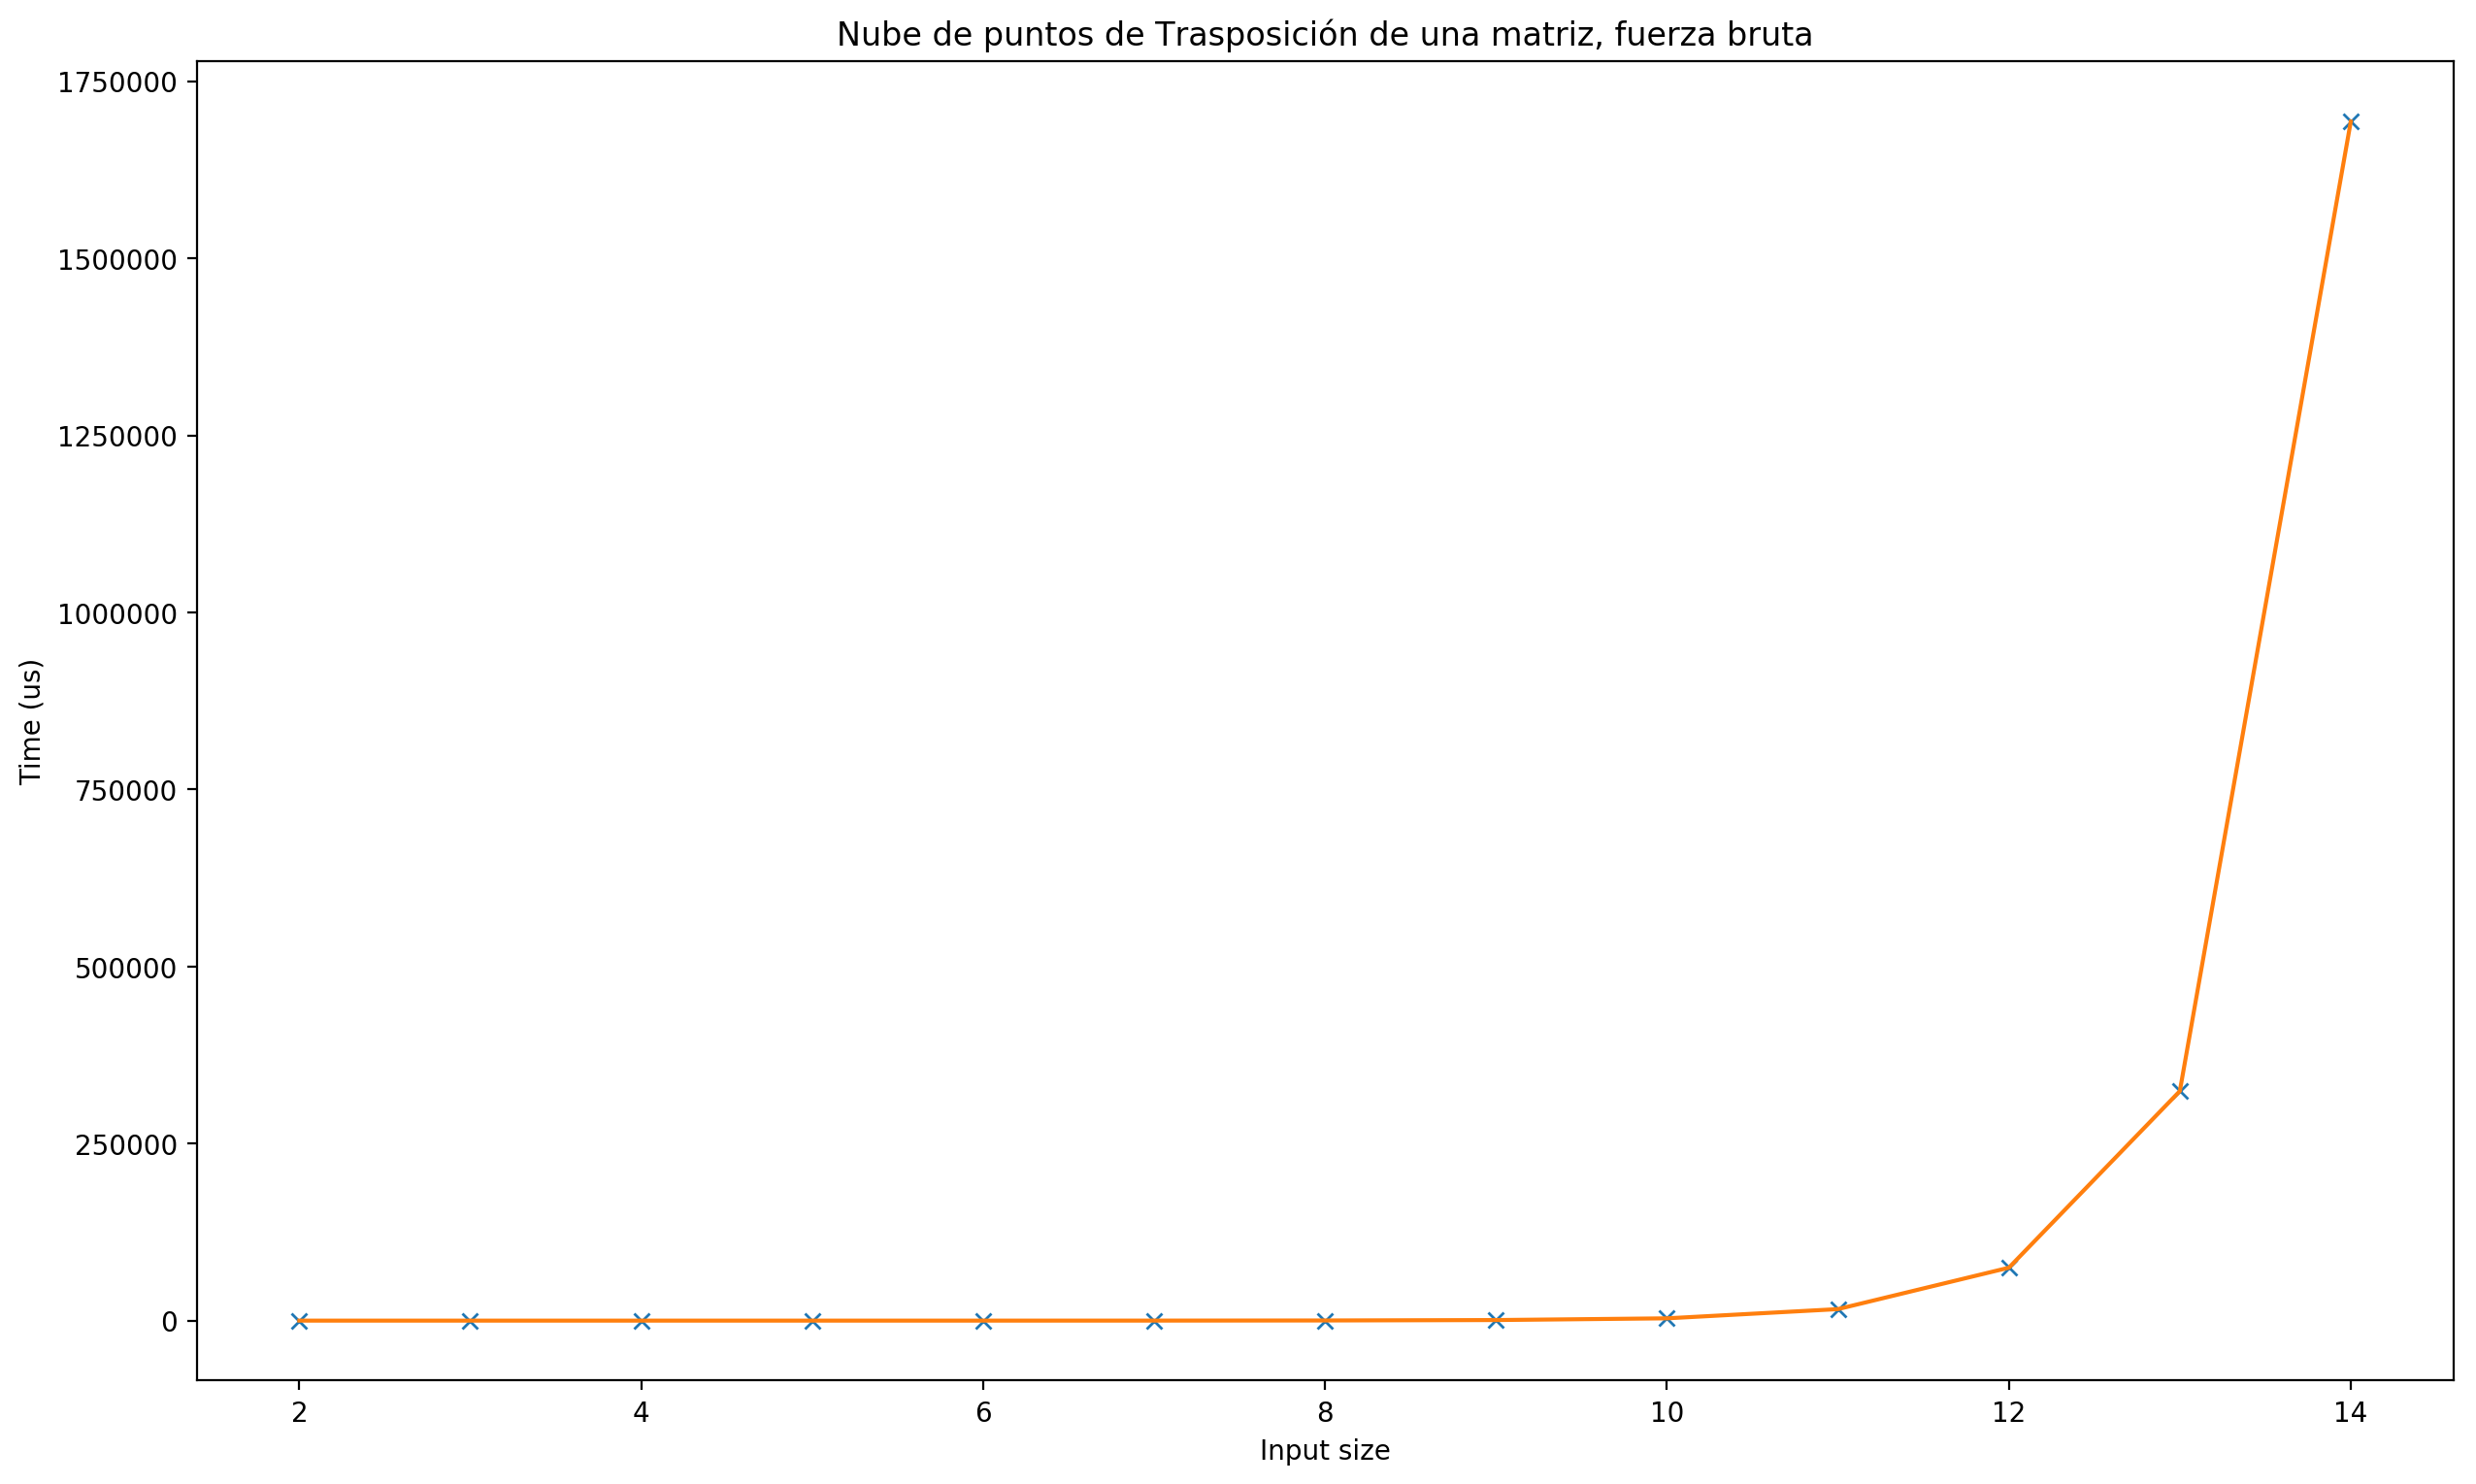

In [48]:
generate_log2_function_plot(csv_brute, f"Nube de puntos de {algorithm_name}, fuerza bruta")

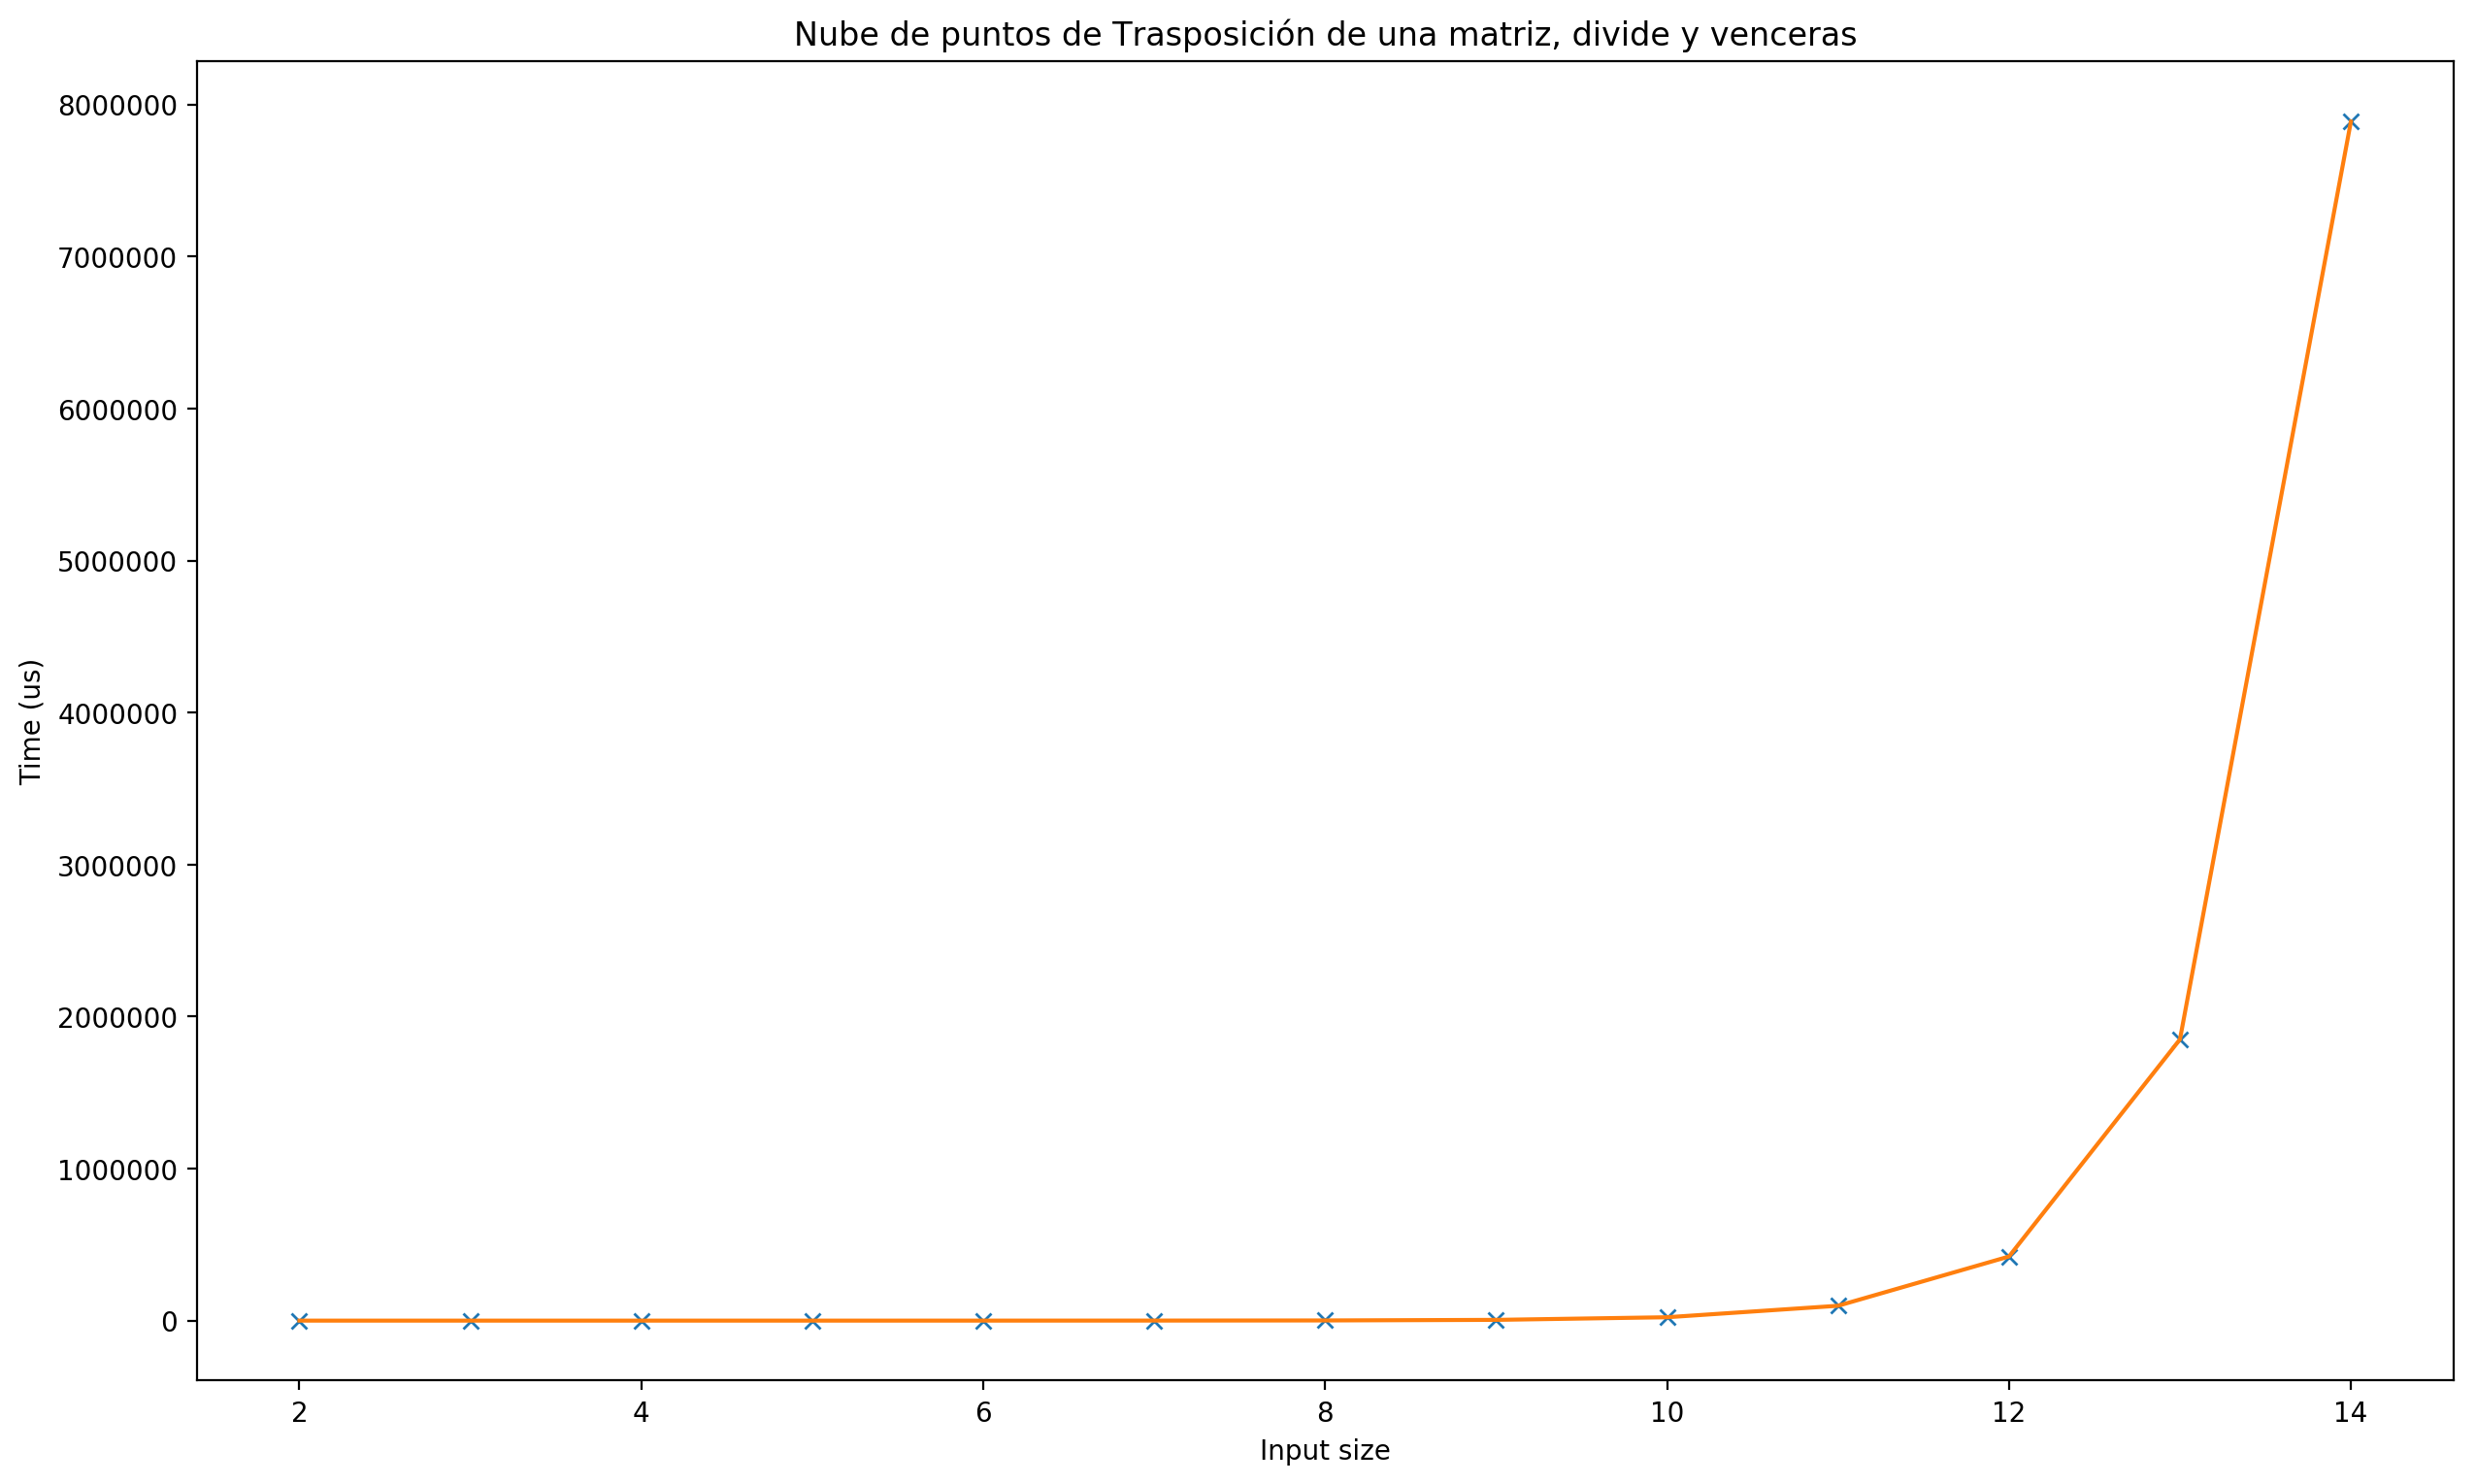

In [49]:
generate_log2_function_plot(csv_dac, f"Nube de puntos de {algorithm_name}, divide y venceras")

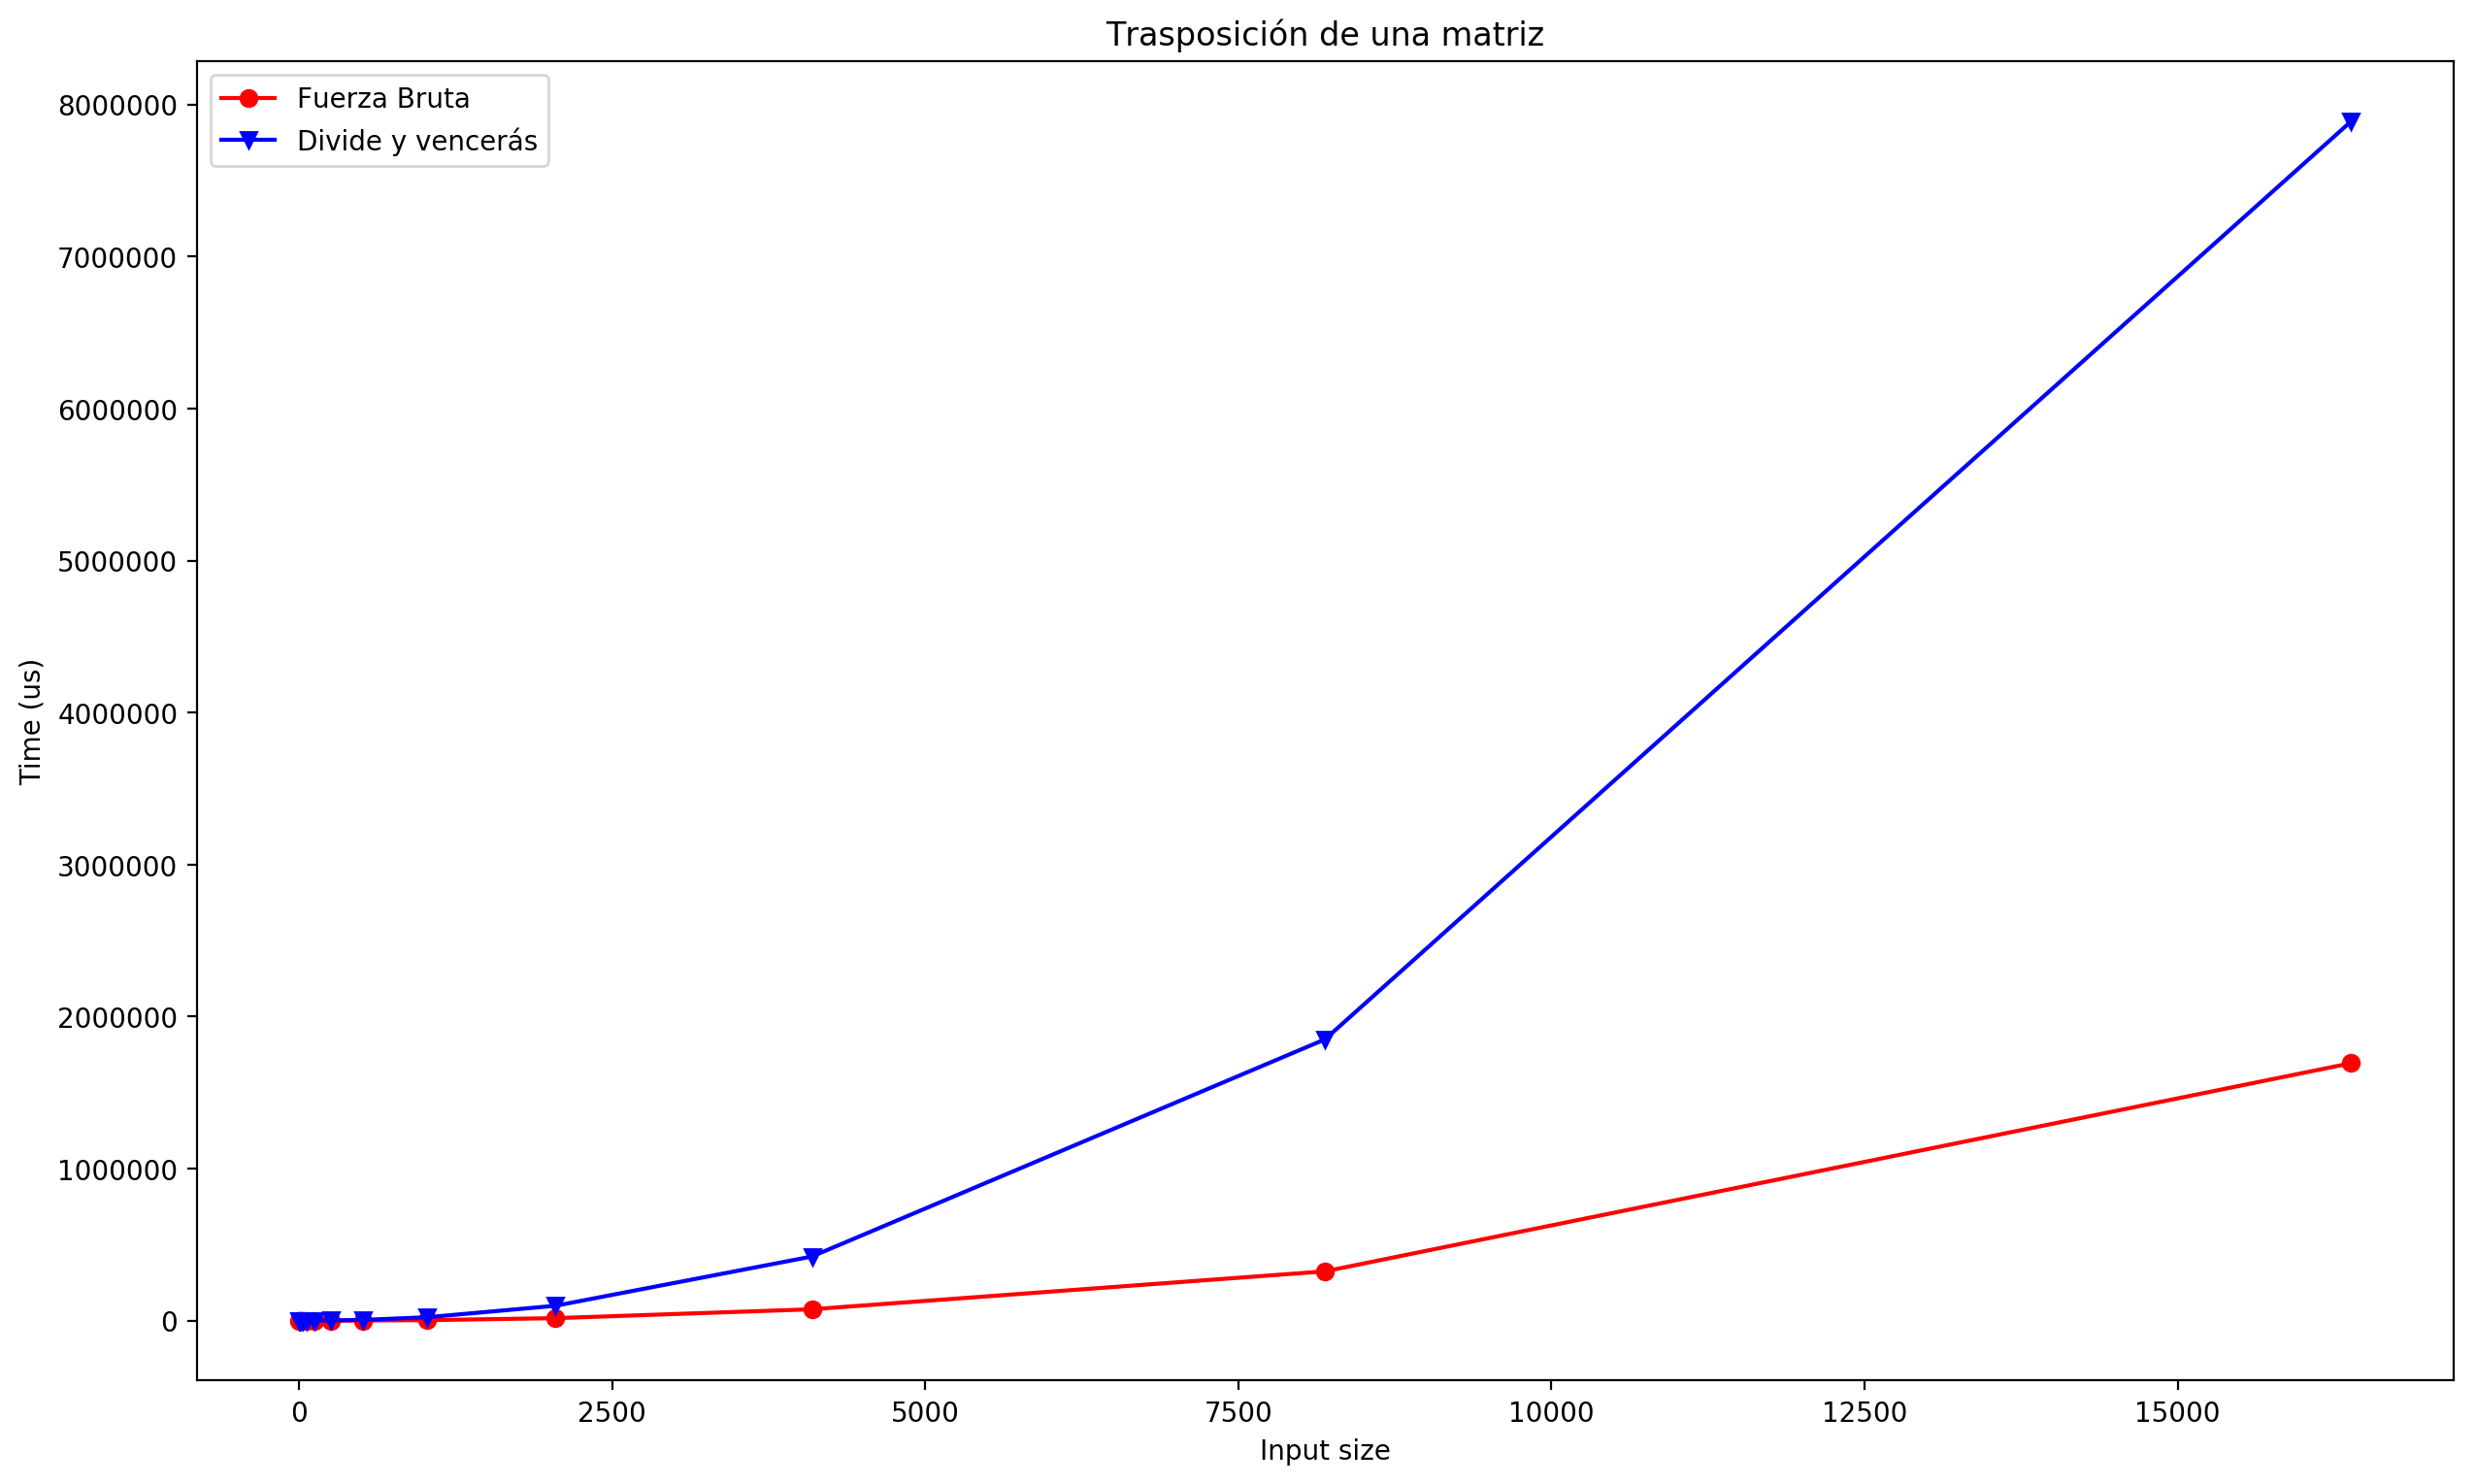

In [50]:
generate_two_functions_plot(algorithm_name, csv_brute, csv_dac)

## Ajuste de una familia de funciones

In [51]:
# Coeficientes y errores
recta_coeficientes, recta_error = fit_function(csv_file, recta)
cuadratica_coeficientes, cuadratica_error = fit_function(csv_file, cuadratica)
cubica_coeficientes, cubica_error = fit_function(csv_file, cubica)
#exponiencial_coeficientes, exponencial_error = fit_function(csv_file, exponencial)
#potencial_coeficientes, potencial_error = fit_function(csv_file, potencial)
logaritmica_coeficientes, logaritmica_error = fit_function(csv_file, logaritmica)
rectalog_coeficientes, rectalog_error = fit_function(csv_file, rectalog)

In [52]:
# Normalizo los errores
recta_error, cuadratica_error, cubica_error, logaritmica_error, rectalog_error = normalize_errors(recta_error, cuadratica_error, cubica_error, logaritmica_error, rectalog_error)

In [56]:
# Muestro los errores calculadores
print(f"Error de la recta: {recta_error}%")
print(f"Error de la cuadratica: {cuadratica_error}%")
print(f"Error de la cubica: {cubica_error}%")
#print(f"Error de la exponencial: {exponencial_error}%")
#print(f"Error de la potencial: {potencial_error}%")
print(f"Error de la logaritmica: {logaritmica_error}%")
print(f"Error de la recta logaritmica: {rectalog_error}%")

Error de la recta: 10.8635643709859%
Error de la cuadratica: 0.042133202523892264%
Error de la cubica: 1.7955821450771792%
Error de la logaritmica: 100.0%
Error de la recta logaritmica: 9.431505431434614%


Por tanto se ve que la función que mejor aproxima los puntos es la cuadrática

## Representación de los mejores puntos

In [57]:
# Se elige la mejor funcion
choosen_f = cuadratica
choosen_coeffs = cuadratica_coeficientes

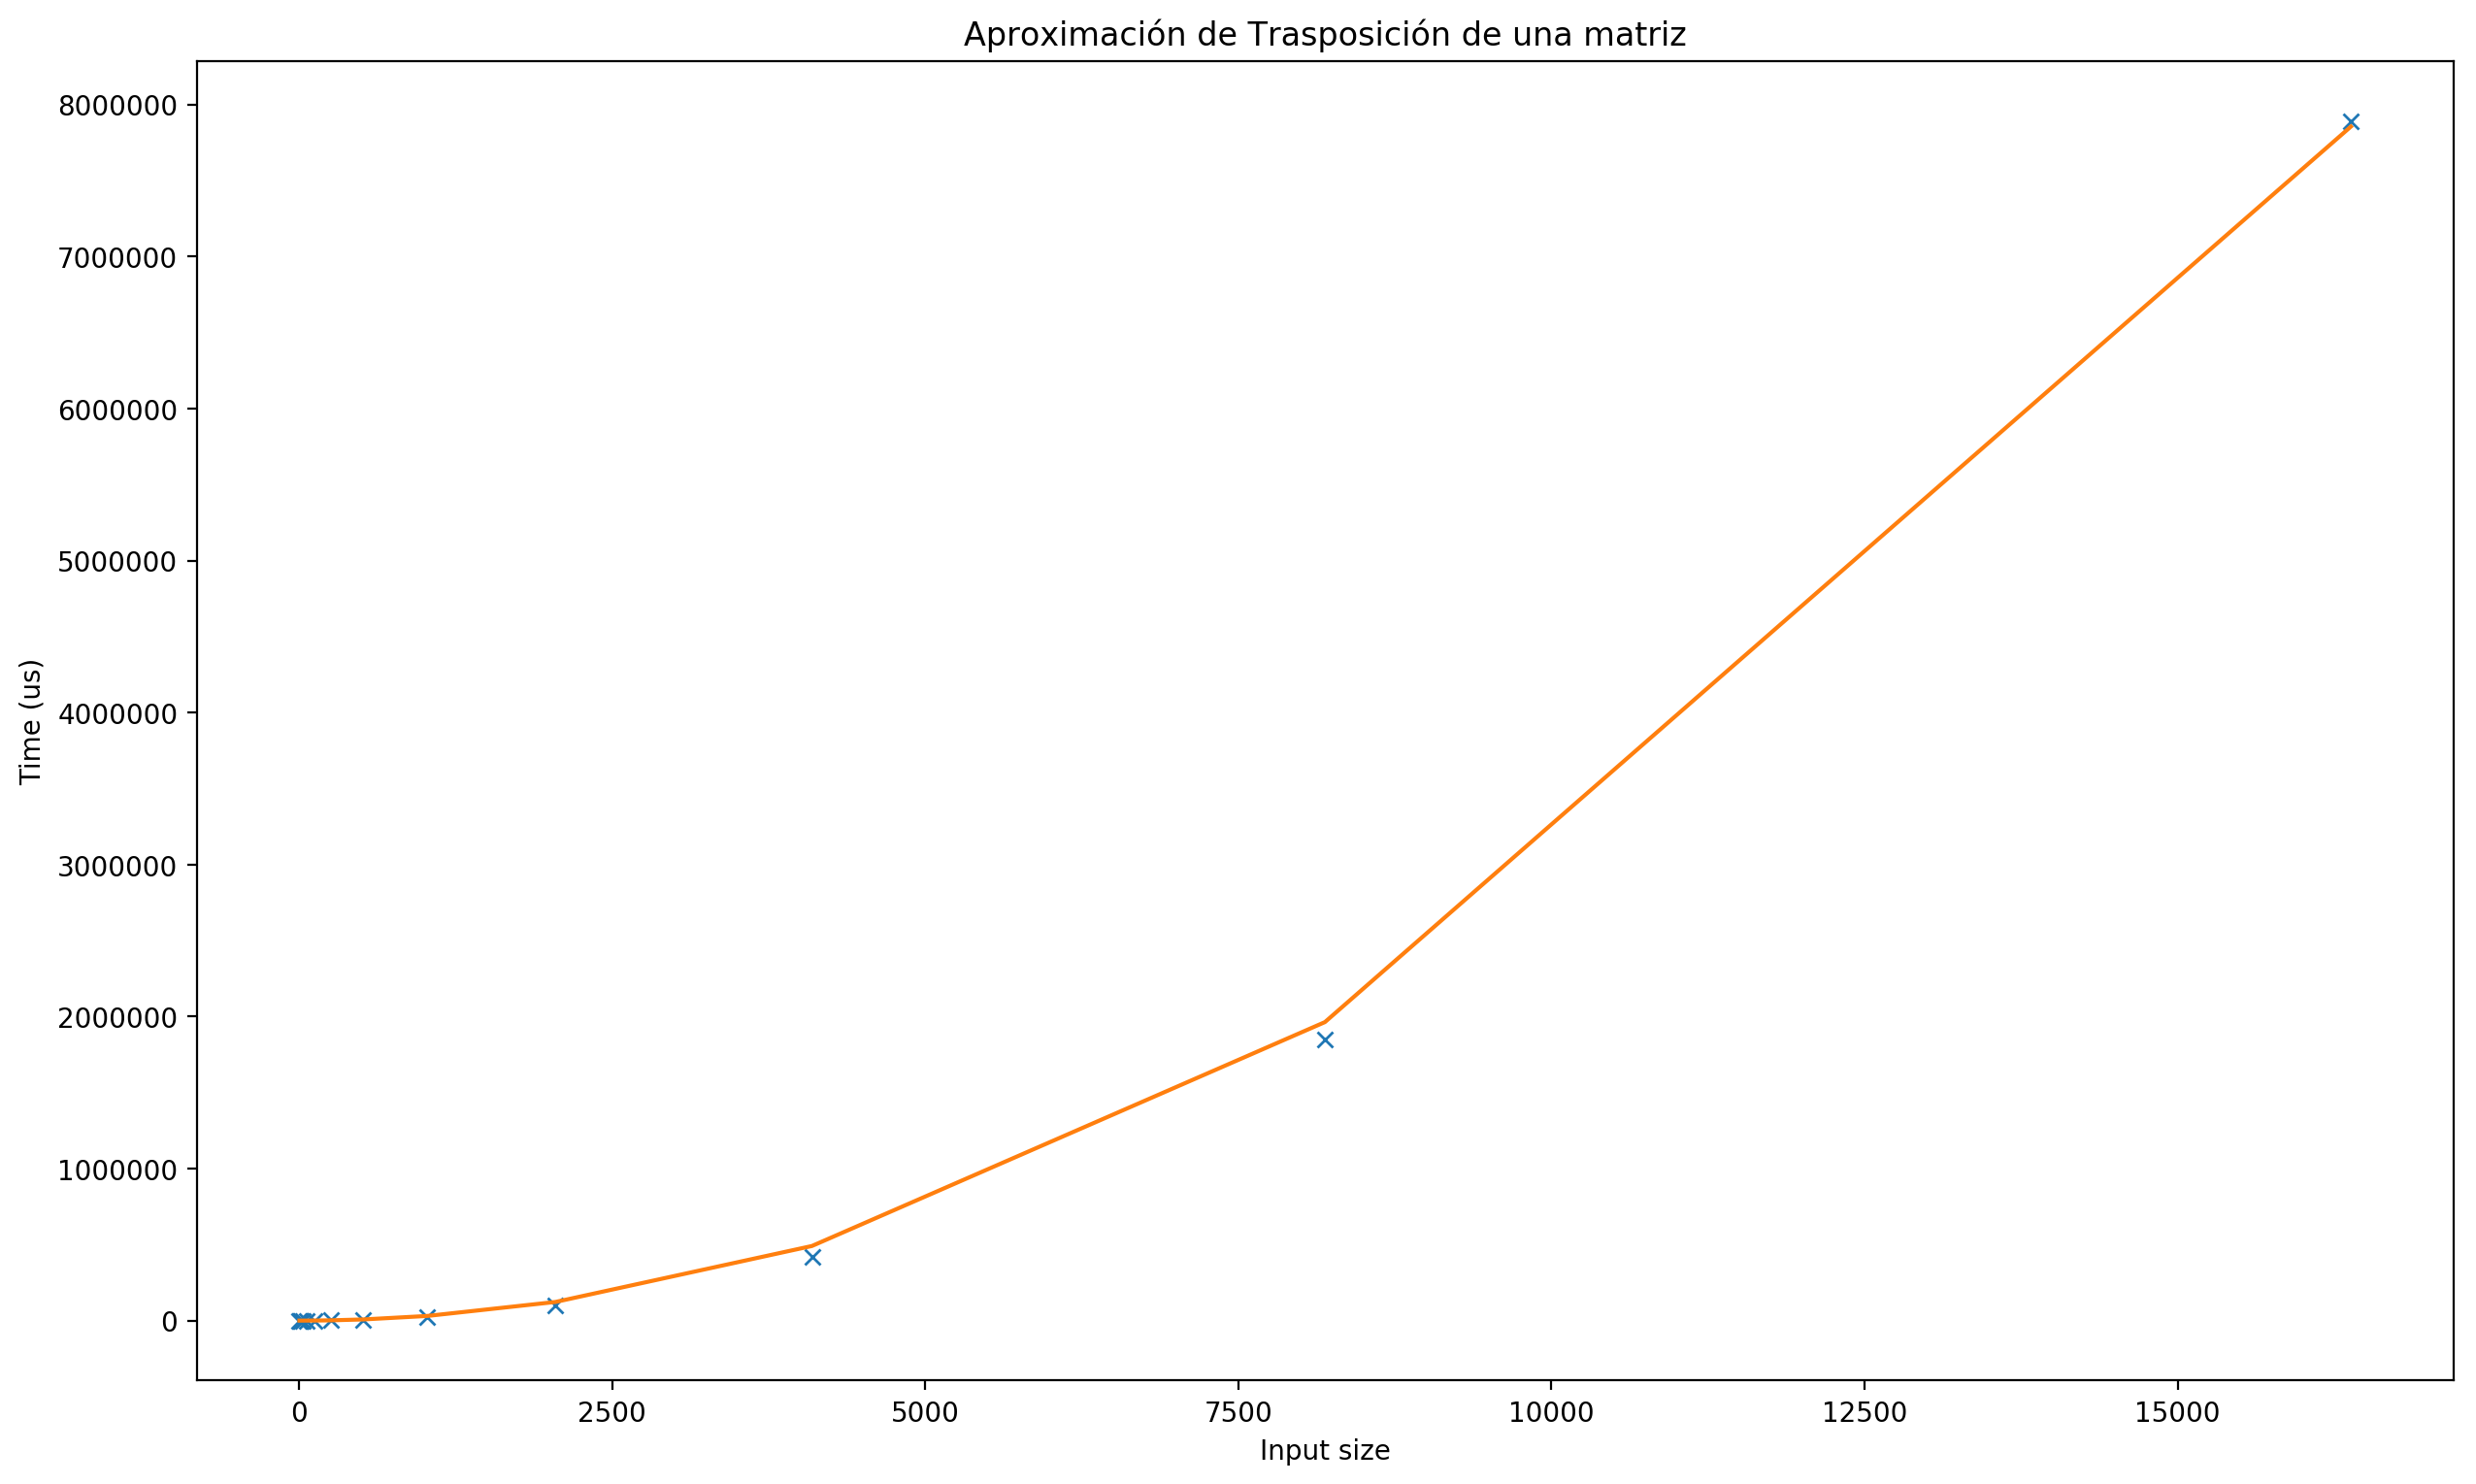

In [58]:
x_values, y_values = generate_data(csv_file)
y_aprox = [choosen_f(x, *choosen_coeffs) for x in x_values]
generate_function_aproximation(x_values, y_values, y_aprox, f"Aproximación de {algorithm_name}")

## Cálculo de constantes ocultas

Calculamos una $k$ óptima con la regresión ya hecha:

In [59]:
print(f"K óptima: {choosen_coeffs}")

K óptima: [0.02926145]


Ahora calculamos $k$ tal que 

$$k=\frac{\sum_{i}{T_i(n)}}{\sum_{i}{f_i(n)}} * \frac{1}{n}$$

donde $T_i(n)$ representa la eficiencia teórica y $f_i(n)$ representa la eficiencia empírica

In [54]:
# Calculo de la constante oculta
k = get_hidden_constant(csv_file, choosen_f, choosen_coeffs)

# Muestro el resultado
print(f"El valor de la constante oculta es k = {k}")

NameError: name 'choosen_f' is not defined

In [55]:
# Represento la función aproximada según la k de la profesora
generate_function_representation("Aproximacíon según la k calculada", csv_file, choosen_f, k)

NameError: name 'choosen_f' is not defined